<a href="https://colab.research.google.com/github/VanHoann/Yelp_Dataset_Challenges/blob/main/Link_Prediction/Graph_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [1]:
import random
import networkx as nx
import numpy as np
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
from community import community_louvain
import collections
from collections import Counter
from collections import defaultdict

###Data Loader

We need to load networks into memory. Usually networks are organized as pairs of nodes. And sometimes different edges have different weights. Hence, we use networkx.DiGraph to store such structure information and attributes.

In [2]:
def load_data(file_name): #convert file to input: a true_edges list
    """
    read edges from an edge file
    """
    edges = list()
    df = pd.read_csv(file_name)
    for idx, row in df.iterrows():
        user_id, friends = row["user_id"], eval(row["friends"])
        for friend in friends:
            # add each friend relation as an edge
            edges.append((user_id, friend))
    edges = sorted(edges)
    
    return edges

def construct_graph_from_edges(edges): #convert input (true_edges list) into a graph
    """
    generate a directed graph object given true edges
    DiGraph documentation: https://networkx.github.io/documentation/stable/reference/classes/digraph.html
    """
    # convert a list of edges {(u, v)} to a list of edges with weights {(u, v, w)}
    edge_weight = defaultdict(float)
    for e in edges:
        edge_weight[e] += 1.0 #edges appear more -> more weights
    weighed_edge_list = list()
    weight_list = []
    for e in sorted(edge_weight.keys()):
        weighed_edge_list.append((e[0], e[1], edge_weight[e]))
        weight_list.append(edge_weight[e])
        
    weights = np.asarray(weight_list)
    print(f"edges have mean weights {weights.mean()} with std {weights.std()}")
    graph = nx.DiGraph()
    graph.add_weighted_edges_from(weighed_edge_list)
    
    print("number of nodes:", graph.number_of_nodes())
    print("number of edges:", graph.number_of_edges())
    
    return graph

##Load data

Firstly, we need to load edges into memory and use the networkx.DiGraph structure to store the graph.

In [3]:
data_dir = "https://raw.githubusercontent.com/VanHoann/Yelp_Dataset_Challenges/main/Link_Prediction/data"
train_file = os.path.join(data_dir,"train.csv")

np.random.seed(0)
train_edges = load_data(train_file)
G = construct_graph_from_edges(train_edges)

edges have mean weights 1.0 with std 0.0
number of nodes: 8343
number of edges: 100000


In [4]:
df = pd.read_csv(train_file)
print(type(df["friends"][0]), df["friends"][0], df["friends"][0][:5])
print(type(eval(df["friends"][0])), eval(df["friends"][0])[0] )

<class 'str'> ['FFFeLM5rk29RZn6FmGlHYQ', 'PFNZVn73upq3oZDG2KnAqA'] ['FFF
<class 'list'> FFFeLM5rk29RZn6FmGlHYQ


In [5]:
print(type(train_edges), len(train_edges))
print(train_edges[:2])

print(type(G))
print(len(G))
print(list(G.nodes())[:2])

<class 'list'> 100000
[('--UOvCH5qEgdNQ8lzR8QYQ', 'FFFeLM5rk29RZn6FmGlHYQ'), ('--UOvCH5qEgdNQ8lzR8QYQ', 'PFNZVn73upq3oZDG2KnAqA')]
<class 'networkx.classes.digraph.DiGraph'>
8343
['--UOvCH5qEgdNQ8lzR8QYQ', 'FFFeLM5rk29RZn6FmGlHYQ']


#Graph visualization

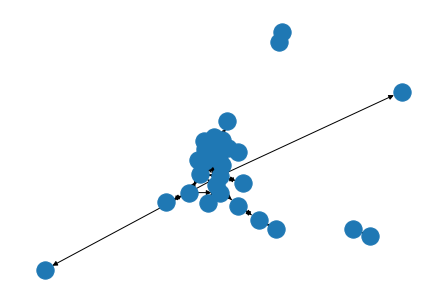

In [6]:
sub = G.subgraph( list(G.nodes())[ :30 ] )
nx.draw(sub, with_labels = False)

Graph info

In [7]:
try: 
  nx.diameter(G)
except:
  print()
print(nx.density(G))


0.0014368372247052206


In [8]:
print(G.is_directed())
print("graph has {} nodes".format(G.number_of_nodes()))
print("graph has {} edges".format(G.number_of_edges()))
node = list(G.nodes())[9]
print(node)
print(list(G.neighbors(node)))

print("Node {} has degree {}".format(node, G.degree[node]))
for neighbor in G.neighbors(node):
  print("Node {} has neighbor {}".format(node, neighbor))

True
graph has 8343 nodes
graph has 100000 edges
8H6X6GhJhYkcNHjuBjOU4w
['-0HhZbPBlB1YZx3BhAfaEA', 'hkSiQAfl6w3882JJQzRTlQ', 'l_eDRCfkLcaiZzl2T9qJdA', 'qewG3X2O4X6JKskxyyqFwQ']
Node 8H6X6GhJhYkcNHjuBjOU4w has degree 11
Node 8H6X6GhJhYkcNHjuBjOU4w has neighbor -0HhZbPBlB1YZx3BhAfaEA
Node 8H6X6GhJhYkcNHjuBjOU4w has neighbor hkSiQAfl6w3882JJQzRTlQ
Node 8H6X6GhJhYkcNHjuBjOU4w has neighbor l_eDRCfkLcaiZzl2T9qJdA
Node 8H6X6GhJhYkcNHjuBjOU4w has neighbor qewG3X2O4X6JKskxyyqFwQ


In [9]:
print(list(G.nodes)[:3])
print(list(G.edges)[:2])
print(list(G.degree)[:3]) #degree of each node
print(sorted(G.degree, key=lambda x:x[1], reverse = True)[:3])
print(sorted(G.degree, key=lambda x:x[1])[:3])

['--UOvCH5qEgdNQ8lzR8QYQ', 'FFFeLM5rk29RZn6FmGlHYQ', 'PFNZVn73upq3oZDG2KnAqA']
[('--UOvCH5qEgdNQ8lzR8QYQ', 'FFFeLM5rk29RZn6FmGlHYQ'), ('--UOvCH5qEgdNQ8lzR8QYQ', 'PFNZVn73upq3oZDG2KnAqA')]
[('--UOvCH5qEgdNQ8lzR8QYQ', 6), ('FFFeLM5rk29RZn6FmGlHYQ', 85), ('PFNZVn73upq3oZDG2KnAqA', 51)]
[('dIIKEfOgo0KqUfGQvGikPg', 776), ('RBZ_kMjowV0t6_nv2UKaDQ', 728), ('qewG3X2O4X6JKskxyyqFwQ', 726)]
[('-2CgKa8YdvPzPB16XSA8Fg', 1), ('pjrpGQtM2Au3hJfypEWA0g', 1), ('-6itJehE4X9y4Zx8uNEFwA', 1)]


In [10]:
sub = G.subgraph( list(G.nodes())[ :50 ] )

Randomize positions for nodes

In [11]:
pos = nx.random_layout(sub, dim=2, seed=1)
print(pos)

{'-2OB54nQ6FsGLUM-R1KXnA': array([0.417022 , 0.7203245], dtype=float32), '-1ZMRA0N01rqZL0TWk3fgA': array([1.14374816e-04, 3.02332580e-01], dtype=float32), '5Nf8EdeXKFyhcAUmRovsrg': array([0.14675589, 0.09233859], dtype=float32), 'F2av57ztcbYiPADtT-YpdA': array([0.18626021, 0.34556073], dtype=float32), '4fE37HSVJitQlI78K8uM1A': array([0.39676747, 0.53881675], dtype=float32), 'cCke3VtFLtqgzkgYSrSE2g': array([0.41919452, 0.6852195 ], dtype=float32), 'cMEtAiW60I5wE_vLfTxoJQ': array([0.20445225, 0.87811744], dtype=float32), 'FFFeLM5rk29RZn6FmGlHYQ': array([0.02738759, 0.6704675 ], dtype=float32), 'uG35h72BAMutvXAWdRpqCQ': array([0.4173048 , 0.55868983], dtype=float32), '-05T0q5BxB9g0RCKiGYoyQ': array([0.14038694, 0.19810149], dtype=float32), 'EDpARScG-X4LTTpeszVmWw': array([0.8007446, 0.9682616], dtype=float32), 'E3pXvQwKsPBQGQ7RkLrN3g': array([0.31342417, 0.6923226 ], dtype=float32), '-3fMaL_ck0wzEsTZyz-mqA': array([0.87638915, 0.89460665], dtype=float32), '3Qv2rjPXC2eNKyV5lh3J_g': array([

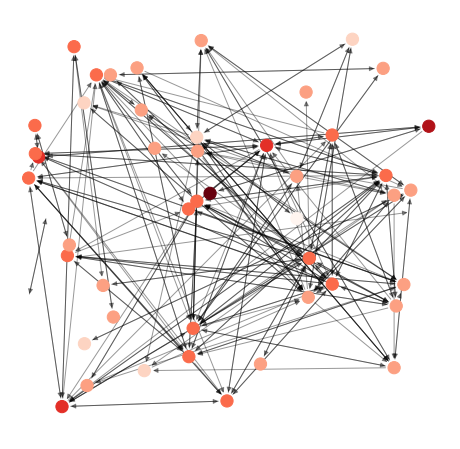

In [12]:
# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(sub, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(sub, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(sub, pos, nodelist=list(p.keys()),
                       node_size=150,
                       node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

the centered node is purple, the farther an other node, the lighter its color

##Graph Analysis

###Node degree

In [13]:
def average_degree(num_edges, num_nodes):
  avg_degree = 0
  avg_degree = int(round(2*num_edges/num_nodes, 0))
  return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of the network is {}".format(avg_degree))

Average degree of the network is 24


graph has 8343 nodes


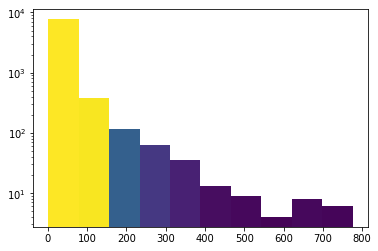

[1.0, 78.5, 156.0, 233.5, 311.0, 388.5, 466.0, 543.5, 621.0, 698.5, 776.0]
[7708, 382, 116, 62, 35, 13, 9, 4, 8, 6]


In [16]:
graph = G
print("graph has {} nodes".format(graph.number_of_nodes()))
plt.yscale('log') #value : {"linear", "log", "symlog", "logit", ...}
(n, bins, patches) = plt.hist([v for k,v in nx.degree(G)])
cmap = plt.cm.viridis
for i, (cnt, value, bar) in enumerate(zip(n, bins, patches)):
    bar.set_facecolor(cmap(cnt/(n.max()/20)))
plt.show()
print(list(bins))
print(list(map(int, n)))

###Centrality
(raw) Closeness centrality: \
A note is important if it has small shortest path lenghts to all other nodes \
i.e. the more centered the node, the shorter the path to others

Equation: $c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$

graph has 8343 nodes


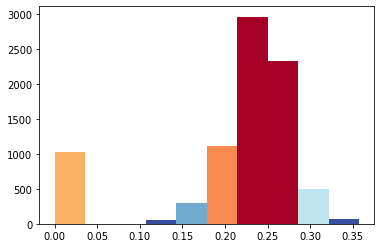

[0.0, 0.04, 0.07, 0.11, 0.14, 0.18, 0.21, 0.25, 0.29, 0.32, 0.36]
[1030, 0, 1, 51, 292, 1119, 2963, 2325, 500, 62]


In [17]:
print("graph has {} nodes".format(graph.number_of_nodes()))
(n, bins, patches) = plt.hist(nx.centrality.closeness_centrality(G).values()) #networkx has normalized the results
cmap = plt.cm.get_cmap('RdYlBu_r')
for i, (cnt, value, bar) in enumerate(zip(n, bins, patches)):
    bar.set_facecolor(cmap(cnt/(n.max()/2)))
plt.show()
bins_round = [round(float(i), 2) for i in list(bins) ]
print(bins_round)
print(list(map(int, n)))

Most of the nodes(~70%) has closeness centrality in (0.2,0.3) indicates that most of the nodes influence its neighborhood similarly and the network seems to be highly connected

###Common neighbors
For each edge u-v, find the number of common neighbors for u and v

In [18]:
common_cnt = []
G1 = G.to_undirected()
for edge in G1.edges():
  u = edge[0]
  v = edge[1]
  common_cnt.append(len(list(nx.common_neighbors(G1, u, v))))

In [19]:
len(common_cnt)

63913

graph has 100000 edges


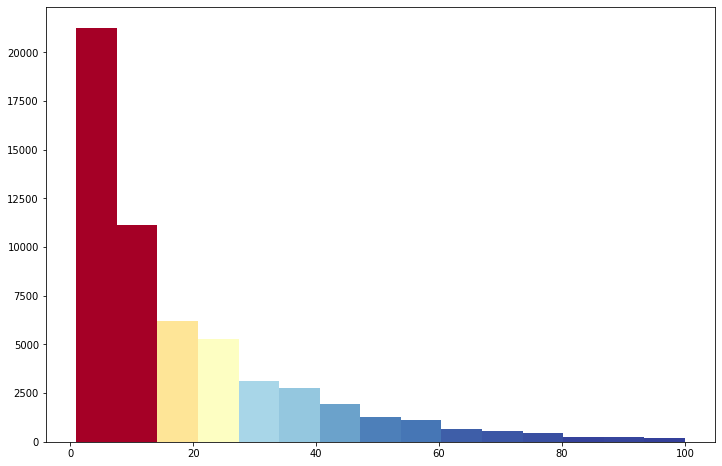

[1.0, 7.6, 14.2, 20.8, 27.4, 34.0, 40.6, 47.2, 53.8, 60.4, 67.0, 73.6, 80.2, 86.8, 93.4, 100.0]
[21266, 11107, 6227, 5253, 3131, 2755, 1939, 1280, 1112, 681, 565, 436, 230, 264, 188]


In [20]:
print("graph has {} edges".format(G.number_of_edges()))
plt.figure(figsize=(12,8))
(n, bins, patches) = plt.hist(common_cnt, bins=15, range = (1,100)) 
cmap = plt.cm.get_cmap('RdYlBu_r')
for i, (cnt, value, bar) in enumerate(zip(n, bins, patches)):
    bar.set_facecolor(cmap(cnt/(n.max()/2)))
plt.show()
bins_round = [round(float(i), 2) for i in list(bins) ]
print(bins_round)
print(list(map(int, n)))

In [21]:
print("graph has {} nodes".format(G.number_of_nodes()))

graph has 8343 nodes


Since there are 8343 nodes and 10000 edges, there are many edges (u,v) that u,v just share a few nodes in common

-> many outliers /local group

###Clustering coefficients
- Indicate the local structure/properties around a node i.e. its immediate vicinity
- Measure how connected a node's neighbors are

Equation: $e(v) = \frac{\text{#(edges among neighboring nodes)}}{\text{#(node pairs among neighboring nodes)} } \in [0,1]$ 


In [22]:
def average_clustering_coefficient(G):
  avg_cluster_coef = 0
  avg_cluster_coef = round(sum(nx.clustering(G).values())/G.number_of_nodes(), 2)
  return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of the network is {}".format(avg_cluster_coef))

Average clustering coefficient of the network is 0.18


graph has 8343 nodes


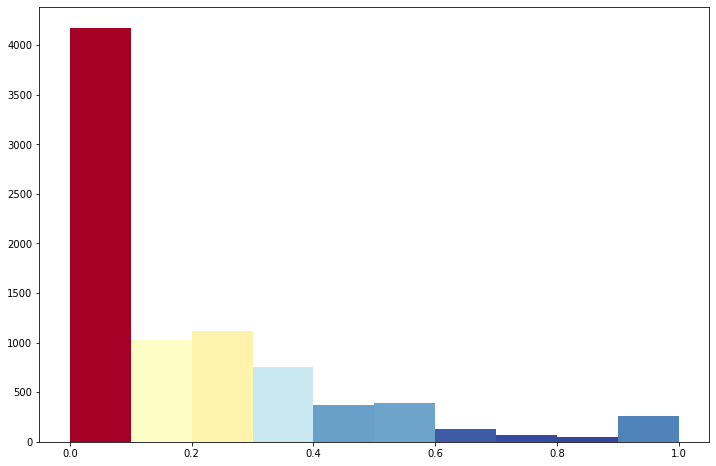

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
[4176, 1022, 1122, 750, 375, 390, 126, 66, 53, 263]


In [23]:
print("graph has {} nodes".format(G.number_of_nodes()))
plt.figure(figsize=(12,8))
(n, bins, patches) = plt.hist(nx.clustering(G).values())
cmap = plt.cm.get_cmap('RdYlBu_r')
for i, (cnt, value, bar) in enumerate(zip(n, bins, patches)):
    bar.set_facecolor(cmap(cnt/(n.max()/2)))
plt.show()
bins_round = [round(float(i), 2) for i in list(bins) ]
print(bins_round)
print(list(map(int, n)))

Most of the nodes (~50%) has clustering coefficients < 0.1 indicates that locally, a node's neighborhood seems to be not connected

##Community Detection

In [24]:
import pandas as pd
import networkx as nx
_DEBUG_ = False

# This method keeps removing edges from Graph until one of the connected components of Graph splits into two
# compute the edge betweenness
def CmtyGirvanNewmanStep(G):
    #global ids
    #print(ids)
    if _DEBUG_:
        print("Running CmtyGirvanNewmanStep method ...")
    init_ncomp = nx.number_connected_components(G)    #no of components
    ncomp = init_ncomp
    while ncomp <= init_ncomp:
        bw = nx.edge_betweenness_centrality(G, weight='weight')    #edge betweenness for G
        #find the edge with max centrality
        max_ = max(bw.values())
        #find the edge with the highest centrality and remove all of them if there is more than one!
        for k, v in bw.items():
            if float(v) == max_:
                G.remove_edge(k[0],k[1])    #remove the central edge
                #ids+=1
                #print("Process "+str(ids))
        ncomp = nx.number_connected_components(G)    #recalculate the no of components


# This method compute the modularity of current split
def _GirvanNewmanGetModularity(G, deg_, m_):
    New_A = nx.adjacency_matrix(G)
    New_deg = {}
    New_deg = UpdateDeg(New_A, G.nodes())
    #Let's compute the Q
    comps = nx.connected_components(G)    #list of components    
    print('No of communities in decomposed G: {}'.format(nx.number_connected_components(G)))
    Mod = 0    #Modularity of a given partitionning
    for c in comps:
        EWC = 0    #no of edges within a community
        RE = 0    #no of random edges
        for u in c:
            EWC += New_deg[u]
            RE += deg_[u]        #count the probability of a random edge
        Mod += ( float(EWC) - float(RE*RE)/float(2*m_) )
    Mod = Mod/float(2*m_)
    if _DEBUG_:
        print("Modularity: {}".format(Mod))
    return Mod


def UpdateDeg(A, nodes):
    deg_dict = {}
    n = len(nodes)  #len(A) ---> some ppl get issues when trying len() on sparse matrixes!
    B = A.sum(axis = 1)
    i = 0
    for node_id in list(nodes):
        deg_dict[node_id] = B[i, 0]
        i += 1
    return deg_dict


# This method runs GirvanNewman algorithm and find the best community split by maximizing modularity measure
def runGirvanNewman(G, Orig_deg, m_):
    #let's find the best split of the graph
    BestQ = 0.0
    Q = 0.0
    while True:    
        CmtyGirvanNewmanStep(G)
        Q = _GirvanNewmanGetModularity(G, Orig_deg, m_);
        print("Modularity of decomposed G: {}".format(Q))
        if Q > BestQ:
            BestQ = Q
            Bestcomps = list(nx.connected_components(G))    #Best Split
            print("Identified components: {}".format(Bestcomps))
        if G.number_of_edges() == 0:
            break
    if BestQ > 0.0:
        print("Max modularity found (Q): {} and number of communities: {}".format(BestQ, len(Bestcomps)))
        print("Graph communities: {}".format(Bestcomps))
    else:
        print("Max modularity (Q):", BestQ)

count=0
nodeToInt = {}
code_edge = list()
for edge in train_edges:
    node1 = edge[0]
    node2 = edge[1]
    if node1 not in nodeToInt.keys():
        nodeToInt[node1] =count
        count+=1
    if node2 not in nodeToInt.keys():
        nodeToInt[node2] = count
        count+=1
    code_edge.append((nodeToInt[node1],nodeToInt[node2]))

n = G.number_of_nodes()    #|V|
A = nx.adjacency_matrix(G)  

m_ = 0.0    #the weighted version for number of edges
m = len(code_edge)
#m_ = m_/2.0
if _DEBUG_:
    print("m: {}".format(m_))

Find the clusters

In [25]:
comms = community_louvain.best_partition(G.to_undirected())
unique_coms = np.unique(list(comms.values()))

In [26]:
print(list(comms.values())[:10]) #which cluster each node belongs to

[0, 0, 0, 1, 1, 2, 2, 2, 2, 2]


In [27]:
len(unique_coms) #no. of clusters

251

In [28]:
import torch
def visualize(h, color, epoch=None, loss=None, accuracy=None):
    plt.figure(figsize=(15,15))
    plt.xticks([])
    plt.yticks([])
 
    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=10, c=color, cmap="Set2")
        if epoch is not None and loss is not None and accuracy['train'] is not None and accuracy['val'] is not None:
            plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
                       f'Training Accuracy: {accuracy["train"]*100:.2f}% \n'
                       f' Validation Accuracy: {accuracy["val"]*100:.2f}%'),
                       fontsize=16)
    else:
        nx.draw_networkx(h, pos=nx.spring_layout(h, seed=42), with_labels=False,
                         width=0.1, node_size=20, node_color=color, cmap="Set2")
    plt.show()

In [29]:
value = torch.from_numpy(np.array(list(comms.values())))

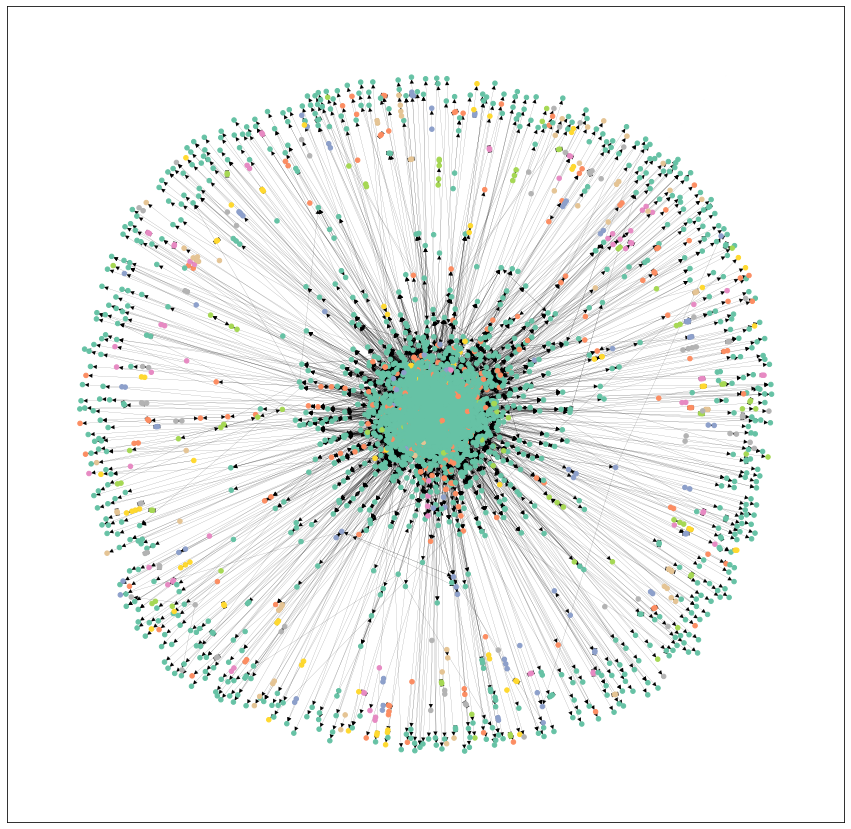

In [30]:
visualize(G, value)

### Discard outliers

In [31]:
for node in list(G.nodes()):
  if G.degree()[node]<10:
    G.remove_node(node)
print(G.number_of_nodes(), G.number_of_edges())

2986 83642


Exclude a lot of nodes but just a small number of edges

In [32]:
comms = community_louvain.best_partition(G.to_undirected())
unique_coms = np.unique(list(comms.values()))

In [33]:
len(unique_coms)

7

In [34]:
Counter(comms.values())

Counter({0: 483, 1: 636, 2: 659, 4: 754, 5: 204, 3: 123, 6: 127})

In [35]:
value = torch.from_numpy(np.array(list(comms.values())))

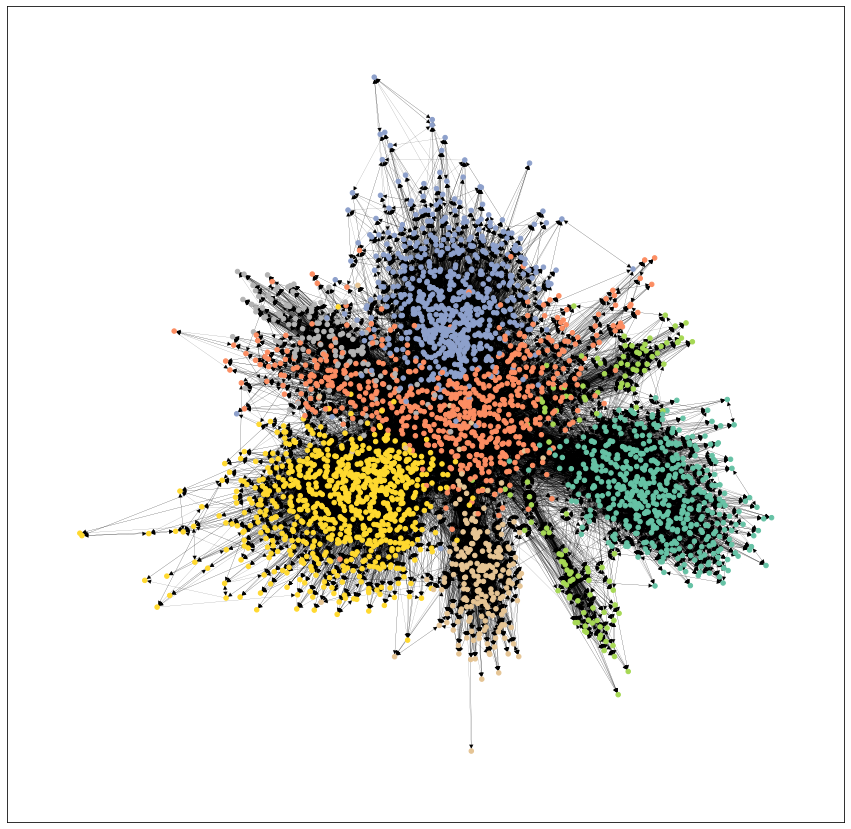

In [36]:
visualize(G, value)